In [43]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from matplotlib import pyplot


## Pavleen Kaur

# Objective: The aim of the project is to use machine learning regression models to predict the exchange rates US Dollar in Chinese Yuan.

Time series financial data is mainly used with the objective of understanding returns on the investments/risks associated with the trade done in the financial products involved whether it is stocks or exchange rate for two or more countries. Usually the course of direction the exchange rate may take is of extreme interest to governments, investment funds and global investors.

There are some conventional econometric models used to understand such time- series financial data e.g.
Autoregressive Integrated Moving Average (ARIMA) model: It is used to understand the data or to predict future points in the series (forecasting) by using the concepts of moving average and lags to regress the value of interest over past value

Challenges with Exchange Rate Financial Data and models:
The nature of the data is heteroskedastic showing periods of volatility.
Single model is unable to capture dynamic relationship between variables.
In general,Financial markets are considered unpredictable in nature.

Machine Learning offers flexibility making relatively few assumptions about functional form of relationship between the exchange rate and explanatory variables giving an opportunity to experiment with various combinations and data sets to understand how they can be used in context of exchange rate forecast.


## Key variables used to predict USD/YUAN exchange rate data (Metadata):

These variables are selected based on the economic theory of Exchange Rates

### Date- Daily exchange rate dates
### FED RATE- Federal Rate of Interest
### US(10)BOND- Interest rates/yields of US Bonds for ten years
### Exchange Rate- Exchange Rate (USD/YUAN) is our target variable
### CH(10)BOND- Interest rates/yields of US Bonds for ten years
### CH(1)BOND- Interest rates/yields of US Bonds for ten years
### S&P Stock- Daily stock market index/point of USA corresponding to the date of exchange rates used in data	
### CH(1) BOND- Interest rates/yields of US Bonds for ten years
### Shanghai Stock- Daily stock market index/point of China corresponding to the date of exchange rates used in data
### PPI- Producer Price Index (economic variable)
### CPI- Consumer Price Index
### TRADE BALANCE- Trade surplus or deficit between two countries
### DEBT- Security bills issed by USA held by various countries (China is the country of interest in the project)


Data Cleaning:
Data has been collected from various websites mainly:
https://fred.stlouisfed.org
https://ticdata.treasury.gov
https://www.investing.com
https://www.census.gov/foreign-trade/balance/c5700.html#2018

The data has been collected in the form of excel,CSV files and web scrapping to generate text files. The data has been comprehensively cleaned using mainly MS-Excel and Pandas. A separate (Jupyter Notebook has been uploaded with clean-up codes used. The entire data has been collected into one excel file called messy data. Upon clean up and transformation e.g. change of data formats, removal of commas and essentially selecting the common dates of all data variables, data has been stored in file called cleanup.csv



## Methodology:

Since it is a prediction problem, five regression models have been used to predict the data:
Linear Regression Model
Lasso Regression Model
Ridge Regression Model
Gradient Boosting Regression
Support Vector Regression

This project has used four scenarios for prediction and inference.

1. Use of all variables and daily data with common dates across variables from year Janary 2005 to May 2019 (cleandata1.csv)(2417 common date entries)
2. Use of all variables and daily data with common dates across variables from year January 2010 to May 2019 (cleandata2.csv)
(1602 common date entries)
3. Use of all variables and daily data with common dates across variables from year January 2018 to May 2019 (cleandata4.csv)
(240 common date entries)
4. Use of only market variables with common dates across variables from year January 2018 to May 2019 (TESTING_PHASE1.csv) 
(323 common date entries)

Also a conventional ARIMA method has also been used to predict the exchange rate

## Measure of performance:

Mean Square Error and Plot visualisations have been used to make inferences


# Scenario 1: All variables (2005 to 2019)

In [455]:
master_data= df=pd.read_csv("cleandata1.csv",sep=',')

In [456]:
master_data.head()

,Date,FED RATE,US(10)BOND,Change %_x,Exchange Rate,Change %_y,CH(10)BOND,Change %_x.1,CH(1)BOND,Change %_y.1,S&P Stock,CH(1) BOND,Shanghai Stock,Change %,PPI,CPI,TRADE BALANCE,DEBT
0,10-Jan-05,2.26,4.273,-0.05%,8.2765,0.00%,4.691,3.30%,2.755,0.62%,1190.25,2.86,1252.40,0.61%,150.9,80.46,-15276.5,224.9
1,11-Jan-05,2.24,4.244,-0.68%,8.2765,0.00%,4.686,-0.11%,2.730,-0.91%,1182.99,2.86,1257.46,0.40%,150.9,80.46,-15276.5,224.9
2,12-Jan-05,2.25,4.238,-0.14%,8.2765,0.00%,4.711,0.53%,2.689,-1.50%,1187.70,2.84,1256.92,-0.04%,150.9,80.46,-15276.5,224.9
3,13-Jan-05,2.29,4.167,-1.68%,8.2765,0.00%,4.628,-1.76%,2.756,2.49%,1177.45,2.84,1256.31,-0.05%,150.9,80.46,-15276.5,224.9
4,14-Jan-05,2.29,4.220,1.27%,8.2765,0.00%,4.568,-1.30%,2.752,-0.15%,1184.52,2.87,1245.62,-0.85%,150.9,80.46,-15276.5,224.9


## Data Visualisation for exchange rate w.r.t dates (2005-2019)


exrate=master_data[['Date', 'Exchange Rate']].copy()
exrate.describe()
plt.figure(figsize=(20,20))
exrate.plot(color='green')
plt.ylabel('usd/yuan exchange rate')
plt.xlabel('Time')
plt.title('Time Series Exchnage Rate Date for USD-YUAN')
plt.show()

## Correlation between variables in Scenario 1

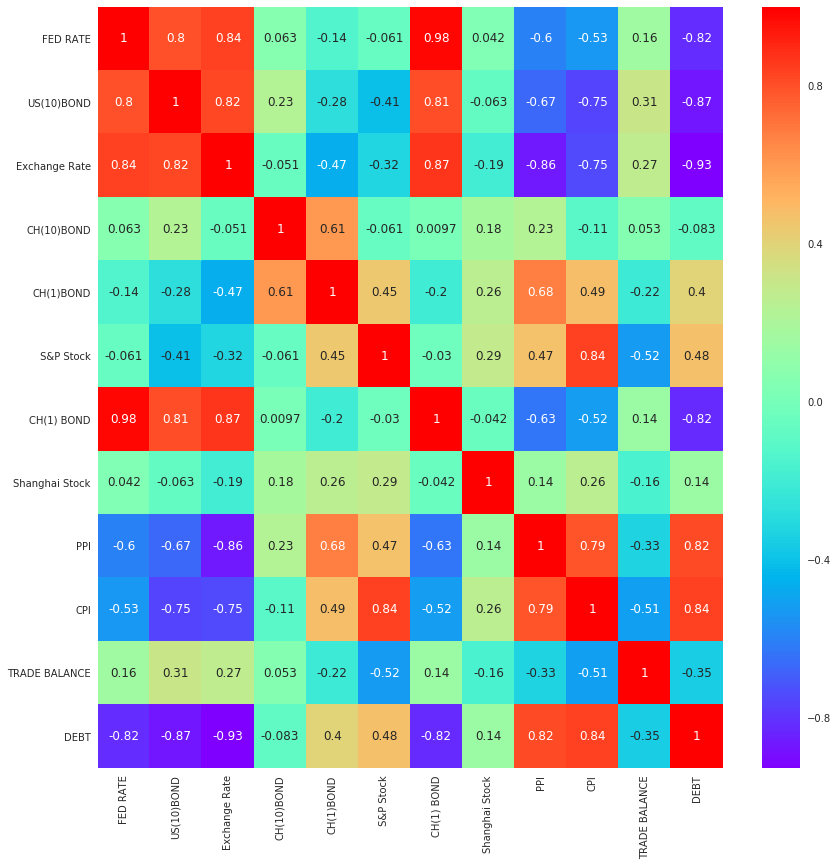

In [458]:

plt.figure(figsize=(14,14))
corr =df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.rainbow)
plt.show()

In [463]:
#Splitting data into train test 
X = master_data
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train=X_train['Exchange Rate']
Y_train.head()
Y_test=X_test['Exchange Rate']


In [464]:
X_train=X_train.drop(['Date','Exchange Rate','Change %_x','Change %_y','Change %_x.1','Change %_y.1','Change %'],axis=1)


In [465]:
X_test=X_test.drop(['Date','Exchange Rate','Change %_x','Change %_y','Change %_x.1','Change %_y.1','Change %'],axis=1)

In [466]:
X_train.head()

,FED RATE,US(10)BOND,CH(10)BOND,CH(1)BOND,S&P Stock,CH(1) BOND,Shanghai Stock,PPI,CPI,TRADE BALANCE,DEBT
0,2.26,4.273,4.691,2.755,1190.25,2.86,1252.40,150.9,80.46,-15276.5,224.9
1,2.24,4.244,4.686,2.730,1182.99,2.86,1257.46,150.9,80.46,-15276.5,224.9
2,2.25,4.238,4.711,2.689,1187.70,2.84,1256.92,150.9,80.46,-15276.5,224.9
3,2.29,4.167,4.628,2.756,1177.45,2.84,1256.31,150.9,80.46,-15276.5,224.9
4,2.29,4.220,4.568,2.752,1184.52,2.87,1245.62,150.9,80.46,-15276.5,224.9


## Model 1- Linear Regression

In [467]:
# Performing Linear Regression
from sklearn.linear_model import LinearRegression

In [468]:
lr=LinearRegression()

In [469]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [470]:
yhat1=lr.predict(X_test)

In [471]:
Array= Y_test.as_matrix(columns=None)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [472]:
error = mean_squared_error(Y_test, yhat1)
print('Test MSE for Linear Regession: %.3f' % error)


Test MSE for Linear Regession: 0.181


## Model 2: LASSO Regression

In [473]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
model = AlphaSelection(LassoCV())

In [474]:
X_train1=X_train
Y_train1=Y_train
X_test1=X_test
Y_test1=Y_test

In [475]:
random_state= 3
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,Y_train1, test_size=.2, random_state= random_state)

In [476]:
X_train2.shape, X_val.shape

((1547, 11), (387, 11))

In [477]:
import numpy as np
alphas = np.logspace(-10, 1, 10)

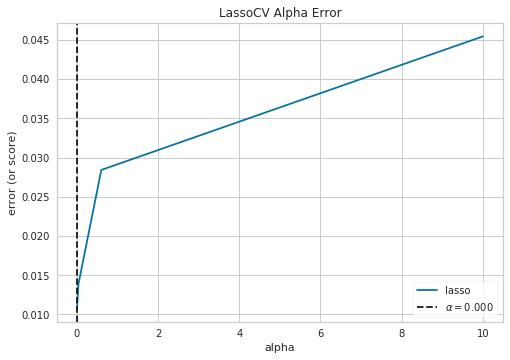

In [478]:
#Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, cv=5)
visualizer = AlphaSelection(model)
visualizer.fit(X_train2, y_train2)
g = visualizer.poof()

In [479]:
(model.fit(X_train2, y_train2))


LassoCV(alphas=array([  1.00000e-10,   1.66810e-09,   2.78256e-08,   4.64159e-07,
         7.74264e-06,   1.29155e-04,   2.15443e-03,   3.59381e-02,
         5.99484e-01,   1.00000e+01]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [480]:
model.score(X_val,y_val)

0.97944496435914508

In [481]:
yhat2=model.predict(X_test1)

## Mean Square Error for LASSO Regression

In [483]:
error = mean_squared_error(Y_test, yhat2)
print('Test MSE for lasso regression: %.3f' % error)


Test MSE for lasso regression: 0.182


## Model 3: Ridge Regression

In [494]:

from sklearn.linear_model import Ridge

In [495]:
rg = Ridge()

In [496]:
rg.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [497]:
yhat3= rg.predict(X_test)


## Mean Square Erros for Ridge Regression

In [498]:
error = mean_squared_error(Y_test, yhat3)
print('Test MSE for Ridge Regression: %.3f' % error)


Test MSE for Ridge Regression: 0.182


## Model 4: Support Vector Regression

In [499]:
from sklearn.svm import SVR

In [500]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, Y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [501]:
yhat4= clf.predict(X_test)

## Mean Square Error for SVR

In [502]:
error = mean_squared_error(Y_test, yhat4)
print('Test MSE for SVR: %.3f' % error)


Test MSE for SVR: 0.095


## Model 5: Gradient Boosting Regressor

In [503]:
from sklearn.ensemble import GradientBoostingRegressor

In [504]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train, Y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [505]:
yhat5= gbr.predict(X_test)

## Mean Square Error for Gradient Boosting Regressor

In [506]:
error = mean_squared_error(Y_test, yhat5)
print('Test MSE for Gradient Boosting Regressor: %.3f' % error)


Test MSE for Gradient Boosting Regressor: 0.065


## Plots showing predicted values by five models with test value as benchmark for Scenario 1

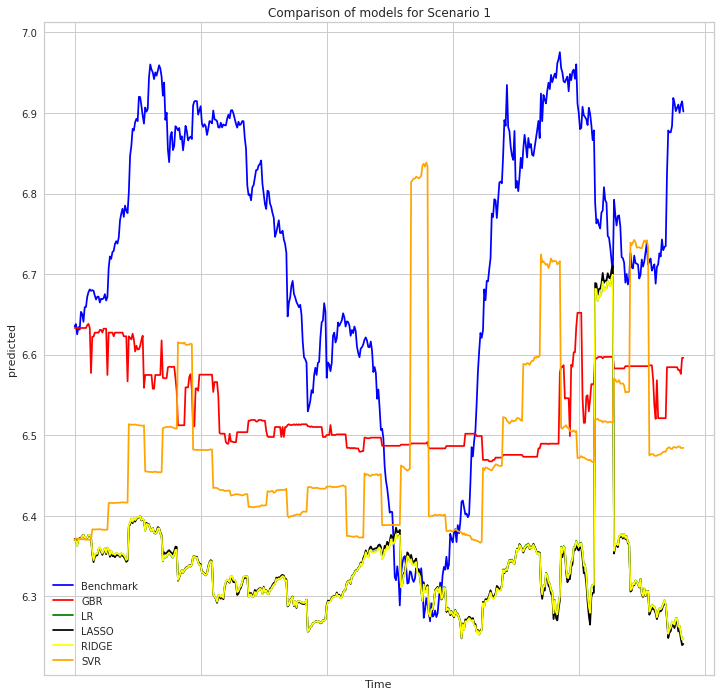

In [507]:
plt.figure(figsize=(12,12))
pyplot.plot(Array,color='blue',label='Benchmark')
pyplot.plot(yhat5, color='red',label='GBR')
pyplot.plot(yhat1, color='green',label='LR')
pyplot.plot(yhat2, color='black',label='LASSO')
pyplot.plot(yhat3, color='yellow',label='RIDGE')
pyplot.plot(yhat4, color='orange',label='SVR')
plt.ylabel('predicted')
plt.xlabel('Time')
plt.title('Comparison of models for Scenario 1')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.legend(loc="best")
plt.show()

In [508]:
#Performance of Conventional Model
from statsmodels.tsa.arima_model import ARIMA
from pandas import read_csv

In [509]:
series = read_csv('exchange_rate_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)


In [510]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.000


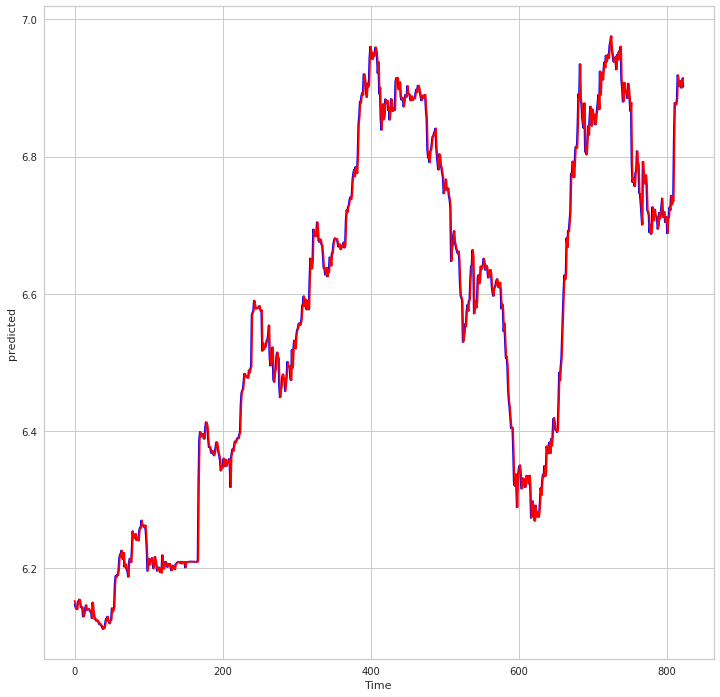

In [511]:

plt.figure(figsize=(12,12))
plt.ylabel('predicted')
plt.xlabel('Time')
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

## Scenario 1: All variables (2010 to 2019)

In [513]:
master_data= df=pd.read_csv("cleandata2.csv",sep=',')

In [514]:
master_data.head()

,Date,FED RATE,US(10)BOND,Change %_x,Exchange Rate,Change %_y,CH(10)BOND,Change %_x.1,CH(1)BOND,Change %_y.1,S&P Stock,CH(1) BOND,Shanghai Stock,Change %,PPI,CPI,TRADE BALANCE,DEBT
0,11-Jan-10,0.11,3.824,-0.31%,6.8263,-0.02%,3.67,1.94%,1.56,0.65%,1146.98,0.35,3212.75,0.52%,181.9,91.42,-15645.5,877.5
1,12-Jan-10,0.11,3.717,-2.80%,6.8270,0.01%,3.60,-1.91%,1.55,-0.64%,1136.22,0.34,3273.97,1.91%,181.9,91.42,-15645.5,877.5
2,13-Jan-10,0.11,3.793,2.04%,6.8298,0.04%,3.75,4.17%,1.58,1.94%,1145.68,0.37,3172.66,-3.09%,181.9,91.42,-15645.5,877.5
3,14-Jan-10,0.11,3.742,-1.34%,6.8270,-0.04%,3.67,-2.13%,1.56,-1.27%,1148.46,0.34,3215.55,1.35%,181.9,91.42,-15645.5,877.5
4,15-Jan-10,0.12,3.676,-1.76%,6.8270,0.00%,3.71,1.09%,1.54,-1.28%,1136.03,0.33,3224.15,0.27%,181.9,91.42,-15645.5,877.5


## Correlation between variables in Scenario 2

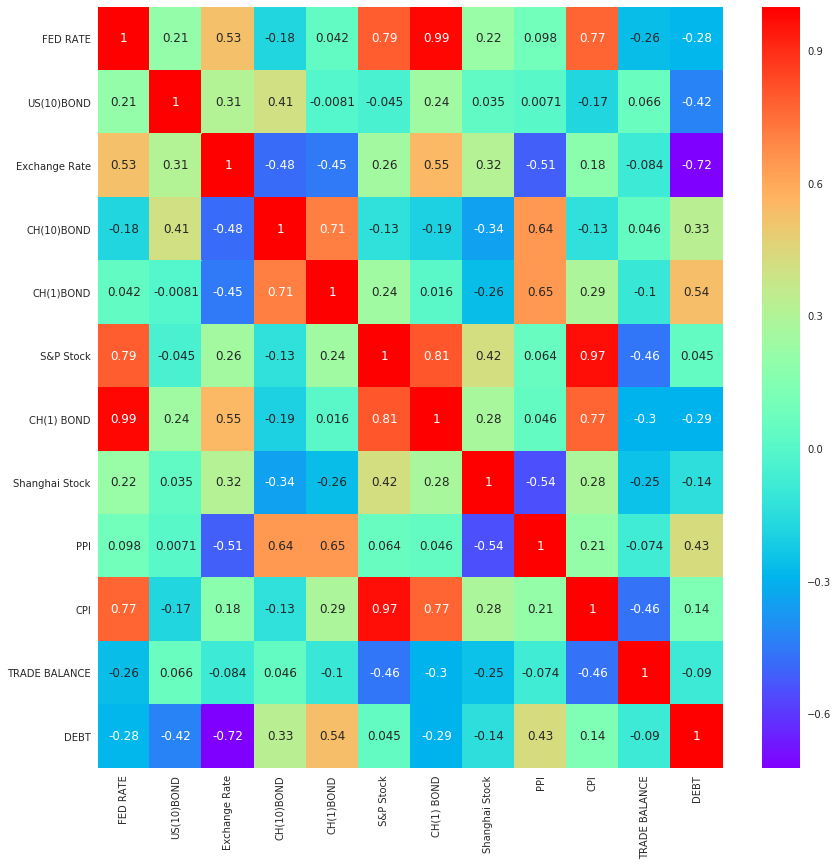

In [516]:
plt.figure(figsize=(14,14))
corr =df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.rainbow)
plt.show()

In [517]:
#Splitting data into train test 
X = master_data
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train=X_train['Exchange Rate']
Y_train.head()
Y_test=X_test['Exchange Rate']


In [518]:
X_train=X_train.drop(['Date','Exchange Rate','Change %_x','Change %_y','Change %_x.1','Change %_y.1','Change %'],axis=1)

In [519]:
X_test=X_test.drop(['Date','Exchange Rate','Change %_x','Change %_y','Change %_x.1','Change %_y.1','Change %'],axis=1)

## Model 1- Linear Regression

In [521]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
yhat1=lr.predict(X_test)
Array= Y_test.as_matrix(columns=None)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [522]:
error = mean_squared_error(Y_test, yhat1)
print('Test MSE for Linear Regession: %.3f' % error)


Test MSE for Linear Regession: 0.799


## Model 2: LASSO Regression

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
model = AlphaSelection(LassoCV())
X_train1=X_train
Y_train1=Y_train
X_test1=X_test
Y_test1=Y_test
random_state= 3
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,Y_train1, test_size=.2, random_state= random_state)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train2, y_train2)
g = visualizer.poof()
model.fit(X_train2, y_train2)
yhat2=model.predict(X_test1)

## Mean Square Error for LASSO Regression

In [536]:
error = mean_squared_error(Y_test, yhat2)
print('Test MSE for lasso regression: %.3f' % error)

Test MSE for lasso regression: 0.723


## Model 3: Ridge Regression

In [538]:
rg.fit(X_train,Y_train)
yhat3= rg.predict(X_test)

## Mean Square Erros for Ridge Regression

In [540]:
error = mean_squared_error(Y_test, yhat3)
print('Test MSE for Ridge Regression: %.3f' % error)

Test MSE for Ridge Regression: 0.751


## Model 4: Support Vector Regression

In [542]:
clf.fit(X_train, Y_train) 
yhat4= clf.predict(X_test)

## Mean Square Error for SVR

In [544]:
error = mean_squared_error(Y_test, yhat4)
print('Test MSE for SVR: %.3f' % error)


Test MSE for SVR: 0.099


## Model 5: Gradient Boosting Regressor

In [546]:
gbr.fit(X_train, Y_train) 
yhat5= gbr.predict(X_test)

## Mean Square Error for Gradient Boosting Regressor

In [548]:
error = mean_squared_error(Y_test, yhat5)
print('Test MSE for Gradient Boosting Regressor: %.3f' % error)

Test MSE for Gradient Boosting Regressor: 0.026


## Plots showing predicted values by five models with test value as benchmark for Scenario 2

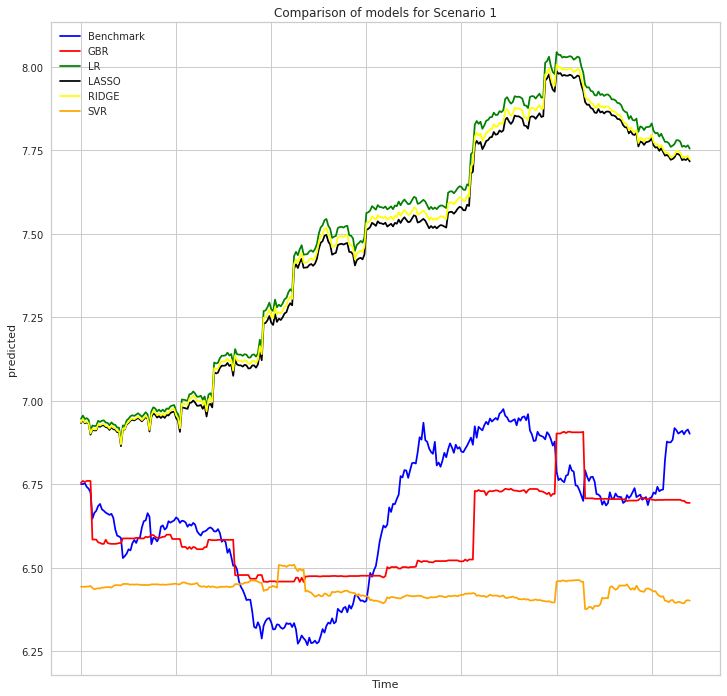

In [550]:
plt.figure(figsize=(12,12))
pyplot.plot(Array,color='blue',label='Benchmark')
pyplot.plot(yhat5, color='red',label='GBR')
pyplot.plot(yhat1, color='green',label='LR')
pyplot.plot(yhat2, color='black',label='LASSO')
pyplot.plot(yhat3, color='yellow',label='RIDGE')
pyplot.plot(yhat4, color='orange',label='SVR')
plt.ylabel('predicted')
plt.xlabel('Time')
plt.title('Comparison of models for Scenario 2')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.legend(loc="best")
plt.show()

In [551]:
# Scenario 1: All variables (2005 to 2019)

In [552]:
master_data= df=pd.read_csv("cleandata4.csv",sep=',')

In [553]:
master_data.head()

,Date,FED RATE,US(10)BOND,Change %_x,Exchange Rate,Change %_y,CH(10)BOND,Change %_x.1,CH(1)BOND,Change %_y.1,S&P Stock,CH(1) BOND,Shanghai Stock,Change %,PPI,CPI,TRADE BALANCE,DEBT
0,10-Jan-18,1.42,2.559,0.31%,6.5081,-0.33%,3.930,0.26%,3.582,1.10%,2748.23,1.78,3421.83,0.23%,197.9,104.58,-29261.5,1168.2
1,11-Jan-18,1.42,2.537,-0.86%,6.4958,-0.19%,3.958,0.71%,3.627,1.26%,2767.56,1.77,3425.34,0.10%,197.9,104.58,-29261.5,1168.2
2,12-Jan-18,1.42,2.550,0.51%,6.4610,-0.54%,3.967,0.23%,3.588,-1.08%,2786.24,1.78,3428.94,0.11%,197.9,104.58,-29261.5,1168.2
3,16-Jan-18,1.42,2.539,-0.50%,6.4440,0.11%,4.024,0.22%,3.630,-0.55%,2776.42,1.79,3436.59,0.77%,197.9,104.58,-29261.5,1168.2
4,17-Jan-18,1.42,2.587,1.89%,6.4343,-0.15%,4.030,0.15%,3.630,0.00%,2802.56,1.79,3444.67,0.24%,197.9,104.58,-29261.5,1168.2


## Correlation between variables in Scenario 3 (2018_2019 with economic variables)

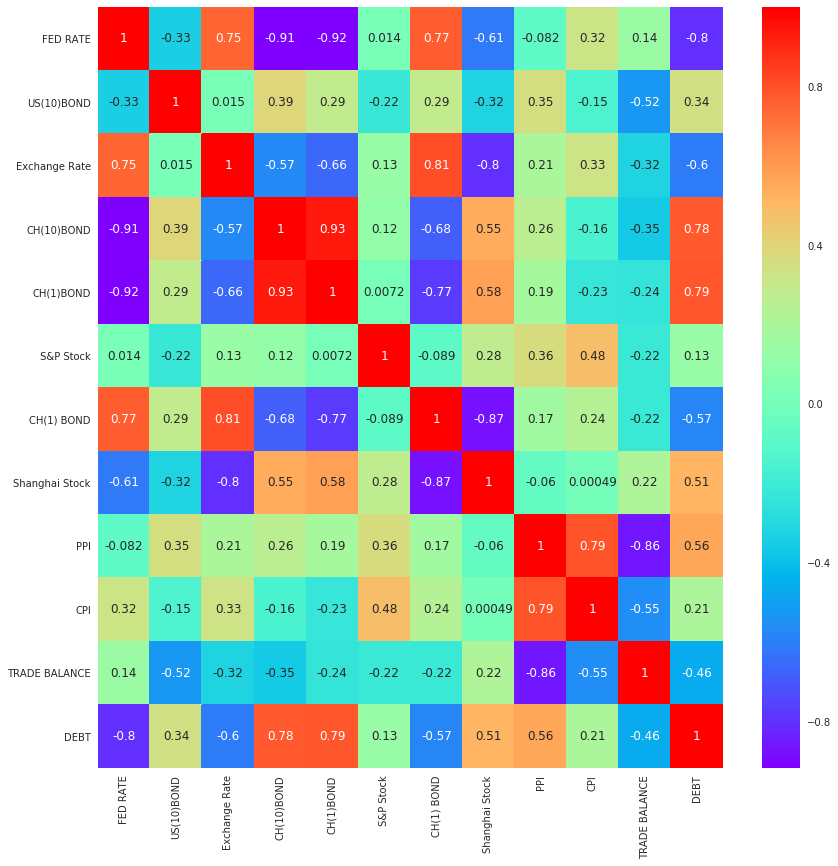

In [555]:
plt.figure(figsize=(14,14))
corr =df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.rainbow)
plt.show()

In [556]:
#Splitting data into train test 
X = master_data
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train=X_train['Exchange Rate']
Y_train.head()
Y_test=X_test['Exchange Rate']

In [557]:
X_train=X_train.drop(['Date','Exchange Rate','Change %_x','Change %_y','Change %_x.1','Change %_y.1','Change %'],axis=1)

In [558]:
X_test=X_test.drop(['Date','Exchange Rate','Change %_x','Change %_y','Change %_x.1','Change %_y.1','Change %'],axis=1)

## Model 1- Linear Regression

In [560]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
yhat1=lr.predict(X_test)
Array= Y_test.as_matrix(columns=None)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [561]:
error = mean_squared_error(Y_test, yhat1)
print('Test MSE for Linear Regession: %.3f' % error)


Test MSE for Linear Regession: 0.066


## Model 2: LASSO Regression

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

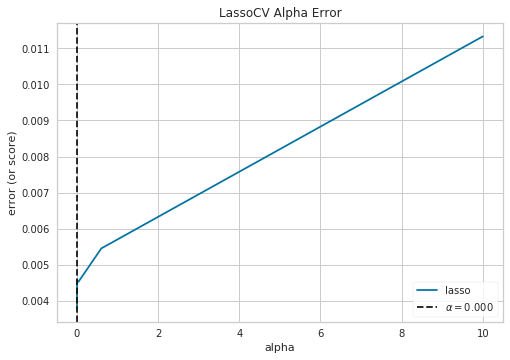

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

In [563]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
model = AlphaSelection(LassoCV())
X_train1=X_train
Y_train1=Y_train
X_test1=X_test
Y_test1=Y_test
random_state= 3
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,Y_train1, test_size=.2, random_state= random_state)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train2, y_train2)
g = visualizer.poof()
model.fit(X_train2, y_train2)
yhat2=model.predict(X_test1)

## Mean Square Error for LASSO Regression

In [565]:
error = mean_squared_error(Y_test, yhat2)
print('Test MSE for lasso regression: %.3f' % error)

Test MSE for lasso regression: 0.050


## Model 3: Ridge Regression

In [567]:
rg.fit(X_train,Y_train)
yhat3= rg.predict(X_test)

## Mean Square Erros for Ridge Regression

In [569]:
error = mean_squared_error(Y_test, yhat3)
print('Test MSE for Ridge Regression: %.3f' % error)

Test MSE for Ridge Regression: 0.014


In [570]:
## Model 4: Support Vector Regression

In [571]:
clf.fit(X_train, Y_train) 
yhat4= clf.predict(X_test)

## Mean Square Error for SVR

In [573]:
error = mean_squared_error(Y_test, yhat4)
print('Test MSE for SVR: %.3f' % error)

Test MSE for SVR: 0.102


## Model 5: Gradient Boosting Regressor

In [575]:
gbr.fit(X_train, Y_train) 
yhat5= gbr.predict(X_test)

## Mean Square Error for Gradient Boosting Regressor

In [577]:
error = mean_squared_error(Y_test, yhat5)
print('Test MSE for Gradient Boosting Regressor: %.3f' % error)

Test MSE for Gradient Boosting Regressor: 0.038


## Plots showing predicted values by five models with test value as benchmark for Scenario 3

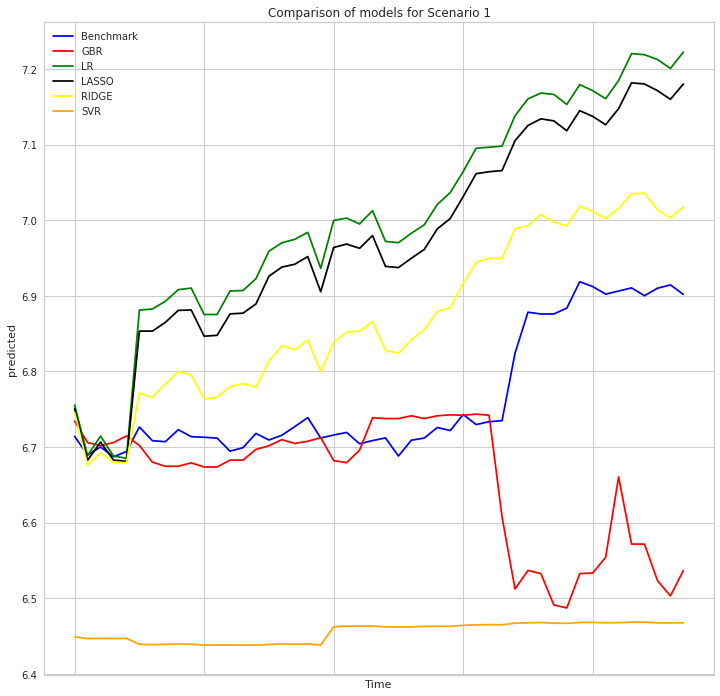

In [579]:
plt.figure(figsize=(12,12))
pyplot.plot(Array,color='blue',label='Benchmark')
pyplot.plot(yhat5, color='red',label='GBR')
pyplot.plot(yhat1, color='green',label='LR')
pyplot.plot(yhat2, color='black',label='LASSO')
pyplot.plot(yhat3, color='yellow',label='RIDGE')
pyplot.plot(yhat4, color='orange',label='SVR')
plt.ylabel('predicted')
plt.xlabel('Time')
plt.title('Comparison of models for Scenario 3')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.legend(loc="best")
plt.show()

## Scenario 1: No economic variables  (2018 to 2019)

In [581]:
master_data= df=pd.read_csv("TESTING_PHASE1.csv",sep=',')

In [582]:
master_data.head()

,Date,Exchange Rate,Change %,S&P Stock,Shanghai Stock,CH(1)BOND,Change %.1,US(1)BOND,Change %.2,CH(10)BOND,Change %.3,US(10)BOND,Change %.4,FED RATE
0,1/2/2018,6.4934,-0.20%,2695.81,3348.33,3.755,-1.26%,1.796,3.25%,3.918,0.08%,2.462,2.35%,1.42
1,1/3/2018,6.5030,0.15%,2713.06,3369.11,3.683,-1.92%,1.814,1.00%,3.920,0.05%,2.445,-0.69%,1.42
2,1/4/2018,6.4934,-0.15%,2723.99,3385.71,3.675,-0.22%,1.806,-0.44%,3.938,0.46%,2.453,0.33%,1.42
3,1/5/2018,6.4887,-0.07%,2743.15,3391.75,3.593,-2.23%,1.803,-0.17%,3.935,-0.08%,2.476,0.94%,1.42
4,1/8/2018,6.4997,0.17%,2747.71,3409.48,3.547,-1.28%,1.787,-0.75%,3.924,-0.28%,2.480,0.15%,1.42


## Correlation between variables in Scenario 4

In [584]:
#Splitting data into train test 
X = master_data
size = int(len(X) * 0.7)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train=X_train['Exchange Rate']
Y_train.head()
Y_test=X_test['Exchange Rate']


In [585]:
X_train=X_train.drop(['Date','Exchange Rate','Change %','Change %.1','Change %.2','Change %.3','Change %.4'],axis=1)

In [586]:
X_test=X_test.drop(['Date','Exchange Rate','Change %','Change %.1','Change %.2','Change %.3','Change %.4'],axis=1)

## Model 1- Linear Regression

In [588]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
yhat1=lr.predict(X_test)
Array= Y_test.as_matrix(columns=None)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Mean Square Error of Linear Model

In [589]:
error = mean_squared_error(Y_test, yhat1)
print('Test MSE for Linear Regession: %.3f' % error)


Test MSE for Linear Regession: 0.064


## Model 2: LASSO Regression

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


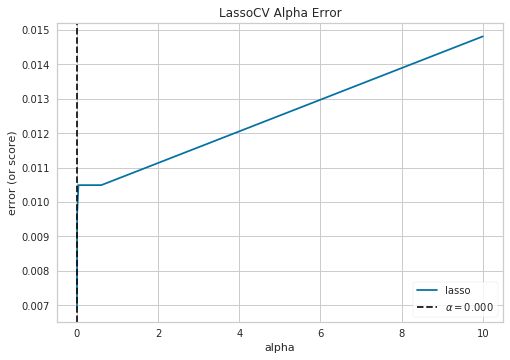

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [593]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
model = AlphaSelection(LassoCV())
X_train1=X_train
Y_train1=Y_train
X_test1=X_test
Y_test1=Y_test
random_state= 3
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,Y_train1, test_size=.2, random_state= random_state)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train2, y_train2)
g = visualizer.poof()
model.fit(X_train2, y_train2)
yhat2=model.predict(X_test1)

## Mean Square Error for LASSO Regression

In [595]:
error = mean_squared_error(Y_test, yhat2)
print('Test MSE for lasso regression: %.3f' % error)

Test MSE for lasso regression: 0.066


## Model 3: Ridge Regression

In [597]:
rg.fit(X_train,Y_train)
yhat3= rg.predict(X_test)

## Mean Square Erros for Ridge Regression

In [599]:
error = mean_squared_error(Y_test, yhat3)
print('Test MSE for Ridge Regression: %.3f' % error)

Test MSE for Ridge Regression: 0.015


## Model 4: Support Vector Regression

In [601]:
clf.fit(X_train, Y_train) 
yhat4= clf.predict(X_test)

## Mean Square Error for SVR

In [603]:
error = mean_squared_error(Y_test, yhat4)
print('Test MSE for SVR: %.3f' % error)

Test MSE for SVR: 0.030


## Model 5: Gradient Boosting Regressor

In [605]:
gbr.fit(X_train, Y_train) 
yhat5= gbr.predict(X_test)

## Mean Square Error for Gradient Boosting Regressor

In [607]:
error = mean_squared_error(Y_test, yhat5)
print('Test MSE for Gradient Boosting Regressor: %.3f' % error)

Test MSE for Gradient Boosting Regressor: 0.016


## Plots showing predicted values by five models with test value as benchmark for Scenario 4

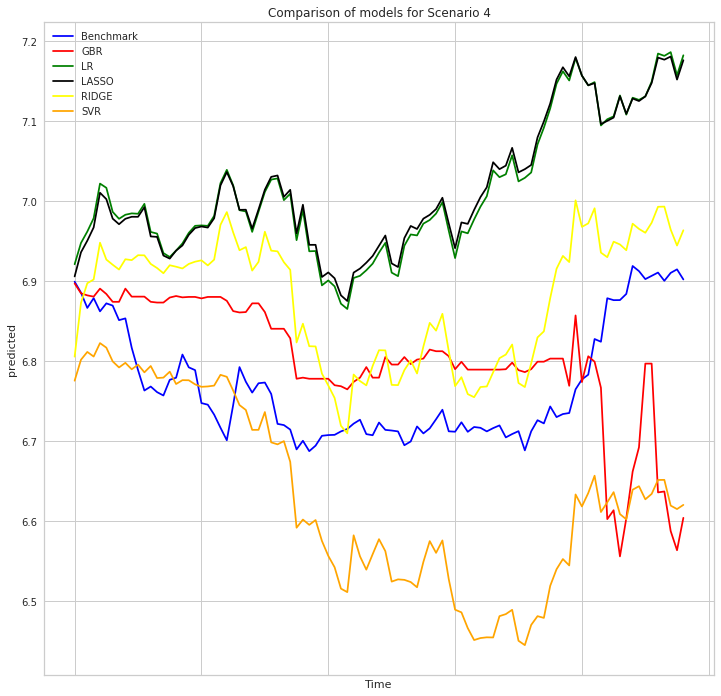

In [617]:
plt.figure(figsize=(12,12))
pyplot.plot(Array,color='blue',label='Benchmark')
pyplot.plot(yhat5, color='red',label='GBR')
pyplot.plot(yhat1, color='green',label='LR')
pyplot.plot(yhat2, color='black',label='LASSO')
pyplot.plot(yhat3, color='yellow',label='RIDGE')
pyplot.plot(yhat4, color='orange',label='SVR')
plt.ylabel('predicted')
plt.xlabel('Time')
plt.title('Comparison of models for Scenario 4')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.legend(loc="best")
plt.show()

## Using conventional ARIMA

In [610]:
from statsmodels.tsa.arima_model import ARIMA

In [611]:
series = read_csv('TESTING_PHASE2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)


Test MSE: 0.000


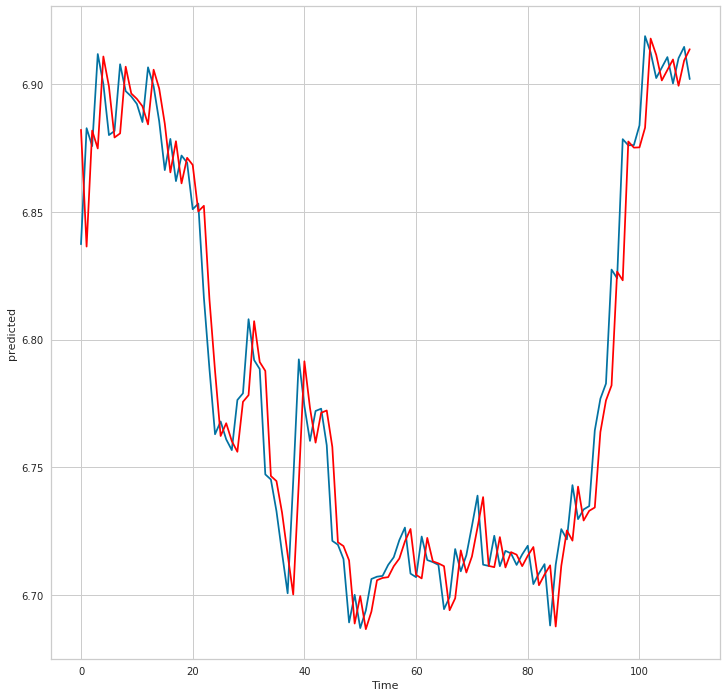

In [612]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.figure(figsize=(12,12))
plt.ylabel('predicted')
plt.xlabel('Time')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Conclusion

Based on four scenarios and introduction of economic variables in the data, it can be seen thatGBR and ridge perform better as we lowered dataset from 2005-2019 towards 2010-2019 and eventually 2018-2019.

Ridge regression gave almost the same results with and without the economic variables in scenarios 3 and 4 whereas GBR performed better without economic variables.

Although Lasso and Linear gave high mean square error, but towards the scenario 4, they could capture the direction of the actual values as to whether the exchange rate increased or decreased at particular times.

Machine Learning Models offer flexibility to incorporate more variables than conventional models

ARIMA (conventional model) showed far better performance in test set prediction than the machine learning models with the mean square error of 0.001

The Machine Learning model can be used to offer a guiding trading strategy if we can use it along with ARIMA and other econometric models

It will be interesting to know how other exchange rate combinations behave.


## Future Scope

There is a lot of scope to introduce sentiment analysis or news analysis in the machine learning model as one of the parameters that lead to fluctuations in exchange rate and other financial time series data

## Literature
Currency exchange prediction using machine learning,genetic algorithms and technical analysis Gon¸calo Abreua,b, Rui Nevesa,c, Nuno Hortaa